In [6]:
import os, sys
root_dir = os.path.dirname(os.path.abspath(''))
if not root_dir in sys.path: sys.path.append(root_dir)

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

from general.transformParas import *
%matplotlib nbagg

<IPython.core.display.Javascript object>


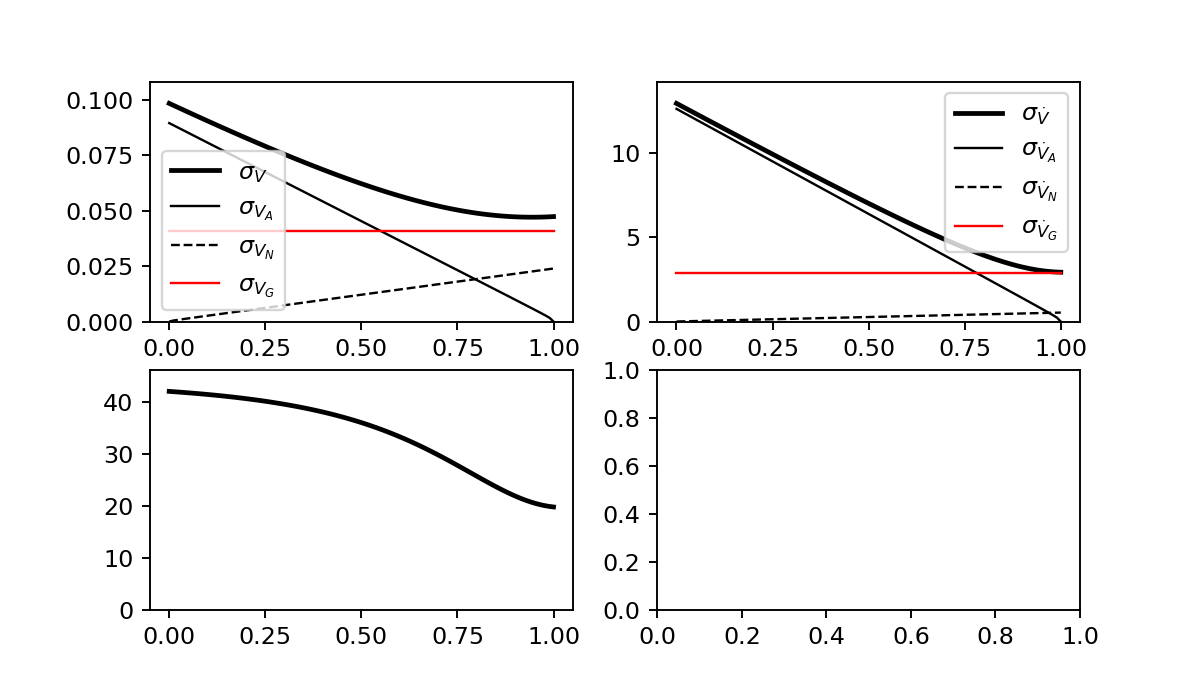

interactive(children=(FloatSlider(value=1.0, description='$\\displaystyle \\nu_E$', max=5.0), FloatSlider(valu…

In [7]:
# general parameters
tau_M = 0.01

# excitatory parameters
nu_E = 1.
tau_A = 0.005
tau_N = 0.2
kappa_E = 4

# inhibitory parameters
nu_I = 2.
tau_G = 0.003

tau_M_range=[0.001,0.05]
tau_A_range=[0.001,0.05]
tau_N_range=[0.001,0.5]
tau_G_range=[0.001,0.05]

nu_E_range=[0.0,5.]
nu_I_range=[0.0,5.]


tau_M_widget = widgets.FloatSlider(tau_M,min=tau_M_range[0],max=tau_M_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_M$',readout_format='.3f')
tau_A_widget = widgets.FloatSlider(tau_A,min=tau_A_range[0],max=tau_A_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_A$',readout_format='.3f')
tau_N_widget = widgets.FloatSlider(tau_N,min=tau_N_range[0],max=tau_N_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_N$',readout_format='.3f')
tau_G_widget = widgets.FloatSlider(tau_G,min=tau_G_range[0],max=tau_G_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_G$',readout_format='.3f')

nu_E_widget = widgets.FloatSlider(1.,min=nu_E_range[0],max=nu_E_range[1],step=0.1,orientation='horizontal',description=r'$\displaystyle \nu_E$')
nu_I_widget = widgets.FloatSlider(1.,min=nu_I_range[0],max=nu_I_range[1],step=0.1,orientation='horizontal',description=r'$\displaystyle \nu_I$')

kappa_widget = widgets.BoundedFloatText(min=0, max=10, value=4, step=0.01)
fig,ax = plt.subplots(2,2,figsize=(7,4))
plt.ion()
r_arr = np.linspace(0,1,101)

h_sigma_V, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=2,label='$\\sigma_V$')
h_sigma_V_A, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=1,label='$\\sigma_{V_A}$')
h_sigma_V_N, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='--',lw=1,label='$\\sigma_{V_N}$')
h_sigma_V_G, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='r',ls='-',lw=1,label='$\\sigma_{V_G}$')

h_sigma_dV, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=2,label='$\\sigma_{\dot{V}}$')
h_sigma_dV_A, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=1,label='$\\sigma_{\dot{V}_A}$')
h_sigma_dV_N, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='k',ls='--',lw=1,label='$\\sigma_{\dot{V}_N}$')
h_sigma_dV_G, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='r',ls='-',lw=1,label='$\\sigma_{\dot{V}_G}$')

h_nu_max, = ax[1][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=2,label='$\\nu^{\text{max}}$')

r_A = 1.-r_arr
r_N = r_arr

#ax[0].hlines(10,0,1,color='k',ls='--')
#ax[1].hlines(10,0,1,color='k',ls='--')

#for i,nu in enumerate([0.1,1.,2.]):
def update_plot(nu_E,nu_I,tau_M,tau_A,tau_N,tau_G,kappa):
    
    J_0 = -1 * tau_M
    
    sigma_I_G = J_0**2 * nu_I / ( 2 * tau_G )
    sigma_I_A = J_0**2 * nu_E / ( 2 * tau_A) * \
     ( r_A**2 + (r_A * r_N * tau_A) / (tau_A + tau_N) )
    sigma_I_N = J_0**2 * nu_E / ( 2 * tau_N) * \
     ( r_N**2 + (r_A * r_N * tau_A) / (tau_A + tau_N) )

    
    sigma_V_G = sigma_I_G * tau_G / ( tau_G + tau_M )
    sigma_V_A = sigma_I_A * tau_A / ( tau_A + tau_M )
    sigma_V_N = sigma_I_N * tau_N / ( tau_N + tau_M )
    
    sigma_V = np.sqrt(sigma_V_G + (sigma_V_A + sigma_V_N) * kappa)
    #print(sigma_V)
    
    sigma_dV_G = sigma_V_G/(tau_G*tau_M)
    sigma_dV_A = sigma_V_A/(tau_A*tau_M)
    sigma_dV_N = sigma_V_N/(tau_N*tau_M)
    
    sigma_dV = np.sqrt(sigma_dV_G + (sigma_dV_A + sigma_dV_N) * kappa)

#    tP = transformParas(**(add_args|{'nu_E':nu}))
#    tP = transformParas(**(add_args|{'gamma':1.4,'delta':delta}))
#    ax[0].plot(r_arr,tP.get_nu_max(r_arr),color=[col,col,col],lw=1,label='$\\bar{\\nu}=%.1f$Hz'%tP.nu_mean)
    #ax[0].plot(r_arr,sigma_V,color='k',ls='-',lw=1,label='$\\sigma_V$')
    h_sigma_V.set_ydata(sigma_V)
    h_sigma_V_A.set_ydata(np.sqrt(sigma_V_A*kappa))
    h_sigma_V_N.set_ydata(np.sqrt(sigma_V_N*kappa))
    h_sigma_V_G.set_ydata(np.sqrt(sigma_V_G))
    
    h_sigma_dV.set_ydata(sigma_dV)
    h_sigma_dV_A.set_ydata(np.sqrt(sigma_dV_A*kappa))
    h_sigma_dV_N.set_ydata(np.sqrt(sigma_dV_N*kappa))
    h_sigma_dV_G.set_ydata(np.sqrt(sigma_dV_G))
    
    nu_max = 1/np.pi * sigma_dV/sigma_V
    #print(nu_max)
    h_nu_max.set_ydata(nu_max)
    
    plt.setp(ax[0][0],ylim=[0,max(0.1,np.nanmax(sigma_V)*1.1)])
    plt.setp(ax[0][1],ylim=[0,max(0.1,np.nanmax(sigma_dV)*1.1)])
    plt.setp(ax[1][0],ylim=[0,max(0.1,np.nanmax(nu_max)*1.1)])
    
#    tP = transformParas(**(add_args_2|{'nu_E':nu}))
#    tP = transformParas(**(add_args_2|{'gamma':1.4,'delta':delta}))
#    ax[1].plot(r_arr,tP.get_nu_max(r_arr),color=[col,col,col],lw=1,label='$\\bar{\\nu}=%.1f$Hz'%tP.nu_mean)
    #plt.show()

ax[0][0].legend()
ax[0][1].legend()

#for axx in ax:
#    plt.setp(axx,xlabel='$r_{NMDA}$',ylabel='$\\nu_{max}$')
widgets.interactive(update_plot,nu_E=nu_E_widget,nu_I=nu_I_widget,tau_M=tau_M_widget,tau_A=tau_A_widget,tau_N=tau_N_widget,tau_G=tau_G_widget,kappa=kappa_widget)

#plt.tight_layout()
#fig.savefig("../figures/var_transform.pdf", bbox_inches='tight')
#plt.show()

# Test widgets

<IPython.core.display.Javascript object>


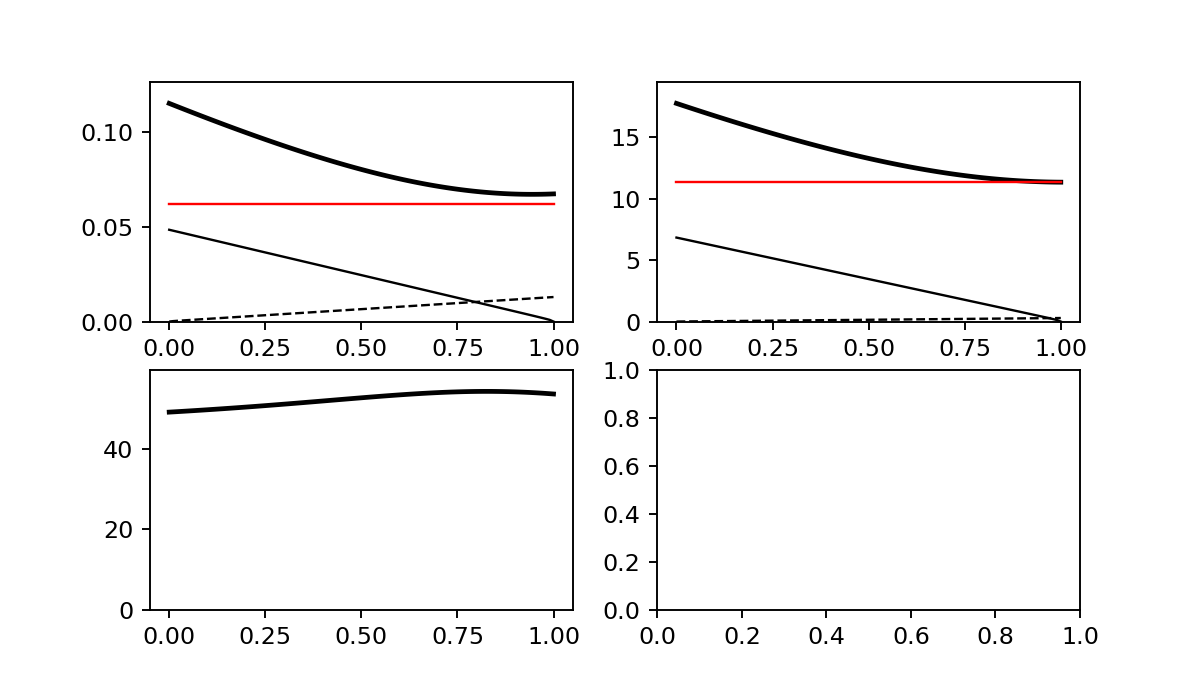

Output()

new: {'name': '_property_lock', 'old': traitlets.Undefined, 'new': {'value': 0.010000000000000002}, 'owner': FloatSlider(value=0.01, description='$\\displaystyle \\tau_M$', max=0.05, min=0.001, readout_format='.3f', step=0.001), 'type': 'change'}
[50.20630786 50.26802021 50.33036766 50.39334937 50.45696401 50.52120964
 50.58608376 50.65158321 50.71770417 50.78444213 50.85179181 50.91974719
 50.98830139 51.05744669 51.12717447 51.19747515 51.26833817 51.33975192
 51.41170371 51.48417974 51.55716499 51.63064324 51.70459698 51.77900736
 51.85385416 51.92911572 52.00476888 52.08078898 52.15714972 52.23382318
 52.31077977 52.3879881  52.46541505 52.54302562 52.62078294 52.69864819
 52.7765806  52.85453739 52.93247372 53.01034268 53.08809524 53.16568027
 53.24304447 53.32013237 53.39688635 53.47324661 53.54915118 53.62453596
 53.6993347  53.77347907 53.84689865 53.91952105 53.9912719  54.06207497
 54.1318522  54.20052385 54.26800856 54.3342235  54.39908446 54.46250602
 54.52440171 54.5846841

TraitError: The 'value' trait of a FloatSlider instance expected a float, not the NoneType None.

new: {'name': '_property_lock', 'old': {}, 'new': {'value': 0.05}, 'owner': FloatSlider(value=0.010000000000000002, description='$\\displaystyle \\tau_M$', max=0.05, min=0.001, readout_format='.3f', step=0.001), 'type': 'change'}
[50.20630786 50.26802021 50.33036766 50.39334937 50.45696401 50.52120964
 50.58608376 50.65158321 50.71770417 50.78444213 50.85179181 50.91974719
 50.98830139 51.05744669 51.12717447 51.19747515 51.26833817 51.33975192
 51.41170371 51.48417974 51.55716499 51.63064324 51.70459698 51.77900736
 51.85385416 51.92911572 52.00476888 52.08078898 52.15714972 52.23382318
 52.31077977 52.3879881  52.46541505 52.54302562 52.62078294 52.69864819
 52.7765806  52.85453739 52.93247372 53.01034268 53.08809524 53.16568027
 53.24304447 53.32013237 53.39688635 53.47324661 53.54915118 53.62453596
 53.6993347  53.77347907 53.84689865 53.91952105 53.9912719  54.06207497
 54.1318522  54.20052385 54.26800856 54.3342235  54.39908446 54.46250602
 54.52440171 54.58468414 54.64326524 54.

In [51]:
tau_M = widgets.FloatSlider(0.01,min=tau_M_range[0],max=tau_M_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_M$',readout_format='.3f')
tau_A = widgets.FloatSlider(0.005,min=tau_A_range[0],max=tau_A_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_A$',readout_format='.3f')
tau_N = widgets.FloatSlider(0.2,min=tau_N_range[0],max=tau_N_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_N$',readout_format='.3f')
tau_G = widgets.FloatSlider(0.003,min=tau_G_range[0],max=tau_G_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_G$',readout_format='.3f')

nu_E = widgets.FloatSlider(nu_E,min=nu_E_range[0],max=nu_E_range[1],step=0.1,orientation='horizontal',description=r'$\displaystyle \nu_E$')
nu_I = widgets.FloatSlider(nu_I,min=nu_I_range[0],max=nu_I_range[1],step=0.1,orientation='horizontal',description=r'$\displaystyle \nu_I$')

plt.ion()

input_widgets = widgets.HBox(
[tau_M, tau_A, tau_N, tau_G, nu_E, nu_I])

plot_output = widgets.Output()

fig,ax = plt.subplots(2,2,figsize=(7,4))
r_arr = np.linspace(0,1,101)

h_sigma_V, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=2,label='$\\sigma_V$')
h_sigma_V_A, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=1,label='$\\sigma_{V_A}$')
h_sigma_V_N, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='--',lw=1,label='$\\sigma_{V_N}$')
h_sigma_V_G, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='r',ls='-',lw=1,label='$\\sigma_{V_G}$')

h_sigma_dV, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=2,label='$\\sigma_{\dot{V}}$')
h_sigma_dV_A, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=1,label='$\\sigma_{\dot{V}_A}$')
h_sigma_dV_N, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='k',ls='--',lw=1,label='$\\sigma_{\dot{V}_N}$')
h_sigma_dV_G, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='r',ls='-',lw=1,label='$\\sigma_{\dot{V}_G}$')

h_nu_max, = ax[1][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=2,label='$\\nu^{\text{max}}$')

r_A = 1.-r_arr
r_N = r_arr

#ax[0].hlines(10,0,1,color='k',ls='--')
#ax[1].hlines(10,0,1,color='k',ls='--')

#for i,nu in enumerate([0.1,1.,2.]):
def update_plot(x):
    print('new:',x)
    J_0 = -1 * tau_M.value
    
    sigma_I_G = J_0**2 * nu_I.value / ( 2 * tau_G.value )
    sigma_I_A = J_0**2 * nu_E.value / ( 2 * tau_A.value) * \
     ( r_A**2 + (r_A * r_N * tau_A.value) / (tau_A.value + tau_N.value) )
    sigma_I_N = J_0**2 * nu_E.value / ( 2 * tau_N.value) * \
     ( r_N**2 + (r_A * r_N * tau_A.value) / (tau_A.value + tau_N.value) )

    
    sigma_V_G = sigma_I_G * tau_G.value / ( tau_G.value + tau_M.value )
    sigma_V_A = sigma_I_A * tau_A.value / ( tau_A.value + tau_M.value )
    sigma_V_N = sigma_I_N * tau_N.value / ( tau_N.value + tau_M.value )
    
    sigma_V = np.sqrt(sigma_V_G + (sigma_V_A + sigma_V_N) * kappa_E)
    #print(sigma_V)
    
    sigma_dV_G = sigma_V_G/(tau_G.value*tau_M.value)
    sigma_dV_A = sigma_V_A/(tau_A.value*tau_M.value)
    sigma_dV_N = sigma_V_N/(tau_N.value*tau_M.value)
    
    sigma_dV = np.sqrt(sigma_dV_G + (sigma_dV_A + sigma_dV_N) * kappa_E)

#    tP = transformParas(**(add_args|{'nu_E':nu}))
#    tP = transformParas(**(add_args|{'gamma':1.4,'delta':delta}))
#    ax[0].plot(r_arr,tP.get_nu_max(r_arr),color=[col,col,col],lw=1,label='$\\bar{\\nu}=%.1f$Hz'%tP.nu_mean)
    #ax[0].plot(r_arr,sigma_V,color='k',ls='-',lw=1,label='$\\sigma_V$')
    h_sigma_V.set_ydata(sigma_V)
    h_sigma_V_A.set_ydata(np.sqrt(sigma_V_A))
    h_sigma_V_N.set_ydata(np.sqrt(sigma_V_N))
    h_sigma_V_G.set_ydata(np.sqrt(sigma_V_G))
    
    h_sigma_dV.set_ydata(sigma_dV)
    h_sigma_dV_A.set_ydata(np.sqrt(sigma_dV_A))
    h_sigma_dV_N.set_ydata(np.sqrt(sigma_dV_N))
    h_sigma_dV_G.set_ydata(np.sqrt(sigma_dV_G))
    
    nu_max = 1/np.pi * sigma_dV/sigma_V
    print(nu_max)
    h_nu_max.set_ydata(nu_max)
    
    plt.setp(ax[0][0],ylim=[0,max(0.1,np.nanmax(sigma_V)*1.1)])
    plt.setp(ax[0][1],ylim=[0,max(0.1,np.nanmax(sigma_dV)*1.1)])
    plt.setp(ax[1][0],ylim=[0,max(0.1,np.nanmax(nu_max)*1.1)])

tau_M.observe(update_plot)

display(input_widgets)
display(plot_output)